___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams["figure.figsize"] = (10,14)

In [2]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
path_1 = "ANSUR II MALE Public.csv"
path_2 = "ANSUR II FEMALE Public.csv"

df_male = pd.read_csv(path_1, encoding="ISO-8859-1")
df_female = pd.read_csv(path_2, encoding="ISO-8859-1")

In [4]:
#Here i will concat the two files
df = pd.concat([df_male, df_female])

In [5]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [6]:
#After concating i need to reset the index
df = df.reset_index()

In [7]:
df.head()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [8]:
df_2= df.copy()

In [9]:
df_2.head()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [10]:
df_2.shape

(6068, 110)

## Explore Data

In [11]:
df_2.info(max_cols=110)
#As we can see here, all of them contains about 6068, but Ethnicity contains only 1421, which is a problem here if we 
#keep it, as it is less than the half and we cannot deal with it.
#furthemore, subjectid, which is in the male file contians about 4082, but it does not affect. So, i will delet it.
#Also, SubjectId, which is in female file contains only 1986, but it is not an importand column, as it does not 
#put any meaning to the model or the data. The id does not affect. 
#So, these columns, i will delet them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    index                           6068 non-null   int64  
 1    subjectid                       4082 non-null   float64
 2    abdominalextensiondepthsitting  6068 non-null   int64  
 3    acromialheight                  6068 non-null   int64  
 4    acromionradialelength           6068 non-null   int64  
 5    anklecircumference              6068 non-null   int64  
 6    axillaheight                    6068 non-null   int64  
 7    balloffootcircumference         6068 non-null   int64  
 8    balloffootlength                6068 non-null   int64  
 9    biacromialbreadth               6068 non-null   int64  
 10   bicepscircumferenceflexed       6068 non-null   int64  
 11   bicristalbreadth                6068 non-null   int64  
 12   bideltoidbreadth  

In [12]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,6068.000,1697.499,1133.004,0.000,758.000,1516.500,2564.250,4081.000
subjectid,4082.000,20003.371,6568.435,10027.000,14270.250,17236.500,27315.750,29452.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
...,...,...,...,...,...,...,...,...
DODRace,6068.000,1.615,0.979,1.000,1.000,1.000,2.000,8.000
Age,6068.000,29.761,8.675,17.000,23.000,28.000,36.000,58.000
Heightin,6068.000,68.257,3.862,56.000,66.000,68.000,71.000,94.000
Weightlbs,6068.000,174.750,33.692,0.000,150.000,173.000,196.000,321.000


In [13]:
#checking if there is any duplicated values
df_2.duplicated().sum()
#No duplicated values here

0

In [14]:
df_2.isnull().sum()
#As we can see there are some null values from the columns (SubjectId, subjectid, Ethnicity)
#So, i will delet them

index                                0
subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         4082
Length: 110, dtype: int64

In [15]:
df_2.columns

Index(['index', 'subjectid', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference', 'SubjectId'],
      dtype='object', length=110)

In [16]:
#Deleting unnecessary colums
df_2.drop(columns=['index','Ethnicity','Component', "subjectid",'PrimaryMOS', 'SubjectNumericRace','Heightin','Installation', 'Branch', 'Weightlbs', "SubjectId", "Date"],inplace=True)


In [17]:
df_2.shape

(6068, 98)

In [18]:
df_2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,Male,North Carolina,2,21,Right hand


### Droping DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [19]:
df_2.DODRace.value_counts().head(10)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [20]:
drop = df_2.DODRace.value_counts()[df_2.DODRace.value_counts() <= 500].index

In [21]:
drop

Index([4, 6, 5, 8], dtype='int64', name='DODRace')

In [22]:
for i in drop:
    column_index = df_2[df_2['DODRace'] == i].index
    df_2.drop(column_index, inplace=True)
    
df_2.reset_index(drop=True, inplace=True)

In [23]:
df_2.DODRace.value_counts().head(10)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [24]:
drop = df_2.DODRace.value_counts()[df_2.DODRace.value_counts() <= 500].index
drop

Index([], dtype='int64', name='DODRace')

In [25]:
df_2.shape

(5769, 98)

In [26]:
df_2.corr(numeric_only=True)[(abs(df_2.corr(numeric_only=True)) >= 0.9) & (abs(df_2.corr(numeric_only=True)) < 1)].any().any()

True

In [27]:
df_2.corr(numeric_only=True)[(abs(df_2.corr(numeric_only=True)) >= 0.9) & (abs(df_2.corr(numeric_only=True)) < 1)].index

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [28]:
df_2.select_dtypes('O').head()

,Gender,SubjectsBirthLocation,WritingPreference
0,Male,North Dakota,Right hand
1,Male,New York,Left hand
2,Male,New York,Left hand
3,Male,Wisconsin,Right hand
4,Male,North Carolina,Right hand


In [29]:
df_2.select_dtypes('O').columns

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [30]:
objs = ['Gender', 'SubjectsBirthLocation','WritingPreference']

trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

trans =trans.set_output(transform="pandas")


In [31]:
df_2["DODRace"] = df_2.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic"
    }
)

In [32]:
X = df_2.drop("DODRace", axis=1)
y = df_2.DODRace

In [33]:
y

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [34]:
X.shape

(5769, 97)

In [35]:
y.shape

(5769,)

In [36]:
X.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,240,440,1054,815,175,853,Male,North Dakota,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,225,371,1054,726,167,815,Male,New York,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,255,411,1041,929,180,831,Male,New York,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,205,399,968,794,176,793,Male,Wisconsin,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,214,379,1245,946,188,954,Male,North Carolina,21,Right hand


In [37]:
y.head()

0    White
1    White
2    Black
3    White
4    Black
Name: DODRace, dtype: object

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [39]:
X_train.shape

(4615, 97)

In [40]:
X_test.shape

(1154, 97)

In [41]:
y_train.shape

(4615,)

In [42]:
y_test.shape

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [43]:
#Here i will build the model with only random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic', LogisticRegression(random_state=101))])

In [44]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting

Test_Set
[[238   4  18]
 [  6  80  50]
 [ 11  17 730]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.79      0.59      0.68       136
       White       0.91      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.85      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 953   13   72]
 [  28  305  210]
 [  25   50 2959]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.83      0.56      0.67       543
       White       0.91      0.98      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.90      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [45]:
#Here i will build the model with class_weight and  random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [46]:
eval_metric(pipe_model2, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting

Test_Set
[[240  13   7]
 [  4 111  21]
 [ 26  90 642]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  457   66]
 [  63  355 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [47]:
#Here i will build the model with class_weight, max_iter and  random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [48]:
eval_metric(model, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting
#Now we are getting better result

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [50]:
#Fore scoring of cross_validate, I should use make scorer for it
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

#For the operations, i will use the last one
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

cv_model = Pipeline(steps=operations)
#With cross_validate, I should put return_train_score to see the scores later
scores = cross_validate(cv_model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))

df_scores.mean()[2:]

#As we can see from the result, the best result we got it from recall, so I will use it for gridSearch

test_precision_Hispanic    0.490
train_precision_Hispanic   0.533
test_recall_Hispanic       0.773
train_recall_Hispanic      0.839
test_f1_Hispanic           0.599
train_f1_Hispanic          0.652
dtype: float64

In [51]:
cv_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('logistic',
   LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'SubjectsBirthLocation',
                                   'WritingPreference'])],
                

### Logistic Model GridsearchCV

In [52]:
#As i said before, i will use recall Hispanic, as it has higher score, than the others. to so do, 
#i will use make scorer with it.
#The label should have a valud of Hispanic
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {
    "logistic__C": [0.5, 1], 
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "lbfgs"],
}

operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

gr_model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator= gr_model, 
                          param_grid= param_grid, 
                          scoring=recall_Hispanic, 
                          cv=10, n_jobs=-1, 
                          return_train_score=True )


grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [65]:
y_pred = grid_model.predict(X_test)
y_pred[:10]

array(['White', 'White', 'White', 'White', 'Hispanic', 'White', 'Black',
       'White', 'Hispanic', 'White'], dtype=object)

In [53]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)
#We can see from the results, there is no sign of overfitting.

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [55]:
#Now, i will see the best estimator for it 
grid_model.best_estimator_

#As we can see from the best estimator, the best C is 1, and it seems that the other params are not important

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [56]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.773
mean_train_score   0.839
Name: 7, dtype: object

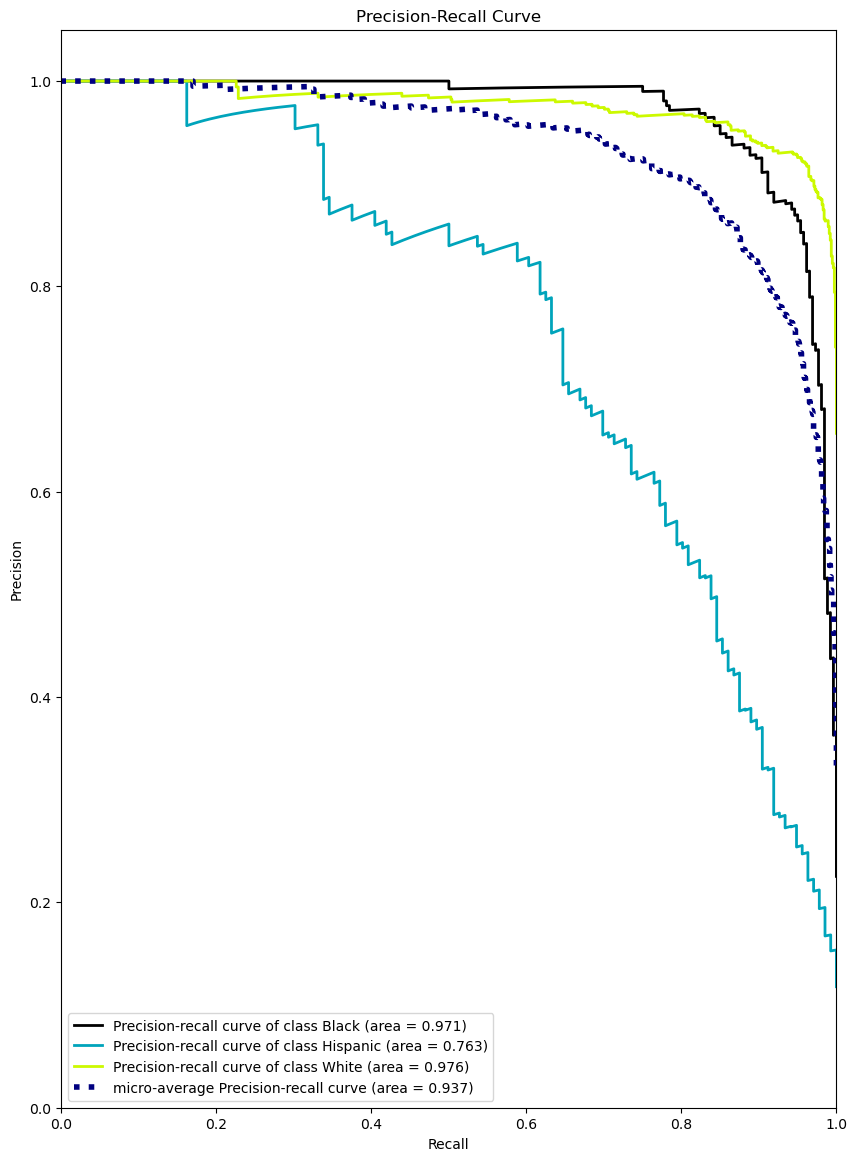

In [57]:
#Now, let's see the graph of it
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

#As we can see from the graph, white class is higher than the others. And Hispanic is the less one

In [60]:
#Now, the scores of this model, should be saved to use it later for comparing them with the other models and see
#which one is better.
y_test_dum = pd.get_dummies(y_test).values

average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])

0.7628593977747096

In [66]:
print('The value of precision', average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1]))
print('The value of recall', recall_score(y_test, y_pred, average=None, labels=["Hispanic"]))
print('The value of f1', f1_score(y_test, y_pred, average=None, labels=["Hispanic"]))

#As we can see the score of recall is higher

The value of precision 0.7628593977747096
The value of recall [0.81617647]
The value of f1 [0.63428571]


In [68]:
#To be able to use these values later on, I will assign them to values, to make it easy 
logistic_pre = average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])
logistic_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
logistic_recall = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [79]:
#Here i will build the model with only random state and see the result
operations = [('OneHotEncoder', trans), ('svc', SVC(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(random_state=101))])

In [80]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
#There is no overfitting

Test_Set
[[229   0  31]
 [  4  41  91]
 [  7   1 750]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       260
    Hispanic       0.98      0.30      0.46       136
       White       0.86      0.99      0.92       758

    accuracy                           0.88      1154
   macro avg       0.93      0.72      0.77      1154
weighted avg       0.89      0.88      0.87      1154


Train_Set
[[ 923    3  112]
 [  38  139  366]
 [  15    5 3014]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92      1038
    Hispanic       0.95      0.26      0.40       543
       White       0.86      0.99      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.92      0.71      0.75      4615
weighted avg       0.89      0.88      0.86      4615



In [93]:
operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [94]:
eval_metric(pipe_model2, X_train, y_train, X_test, y_test)
#There is no overfitting
#The results for Hispanic in the recall now is better

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [95]:
#Now, the cross_validate part
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

cv_model = Pipeline(steps=operations)

scores = cross_validate(cv_model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

#As we can see from the scores, the recall scores is better

test_precision_Hispanic    0.451
train_precision_Hispanic   0.495
test_recall_Hispanic       0.760
train_recall_Hispanic      0.835
test_f1_Hispanic           0.565
train_f1_Hispanic          0.622
dtype: float64

In [96]:
pipe_model2.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('svc', SVC(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'SubjectsBirthLocation',
                                   'WritingPreference'])],
                   verbose_feature_names_out=False),
 

###  SVC Model GridsearchCV

In [97]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

gr_model = Pipeline(steps=operations)

grid_model_svc = GridSearchCV(estimator=gr_model, param_grid= param_grid,scoring=recall_Hispanic,cv=10,n_jobs=-1,return_train_score=True,)

grid_model_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [106]:
y_pred = grid_model_svc.predict(X_test)
y_pred[:10]

array(['White', 'White', 'Hispanic', 'White', 'Hispanic', 'White',
       'Black', 'White', 'Hispanic', 'White'], dtype=object)

In [101]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)
#No overfitting as well

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [98]:
grid_model_svc.best_estimator_
#As we can see the best C is 1 and it also ignored the others.

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [99]:
pd.DataFrame(grid_model_svc.cv_results_).loc[
    grid_model_svc.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.760
mean_train_score   0.835
Name: 3, dtype: object

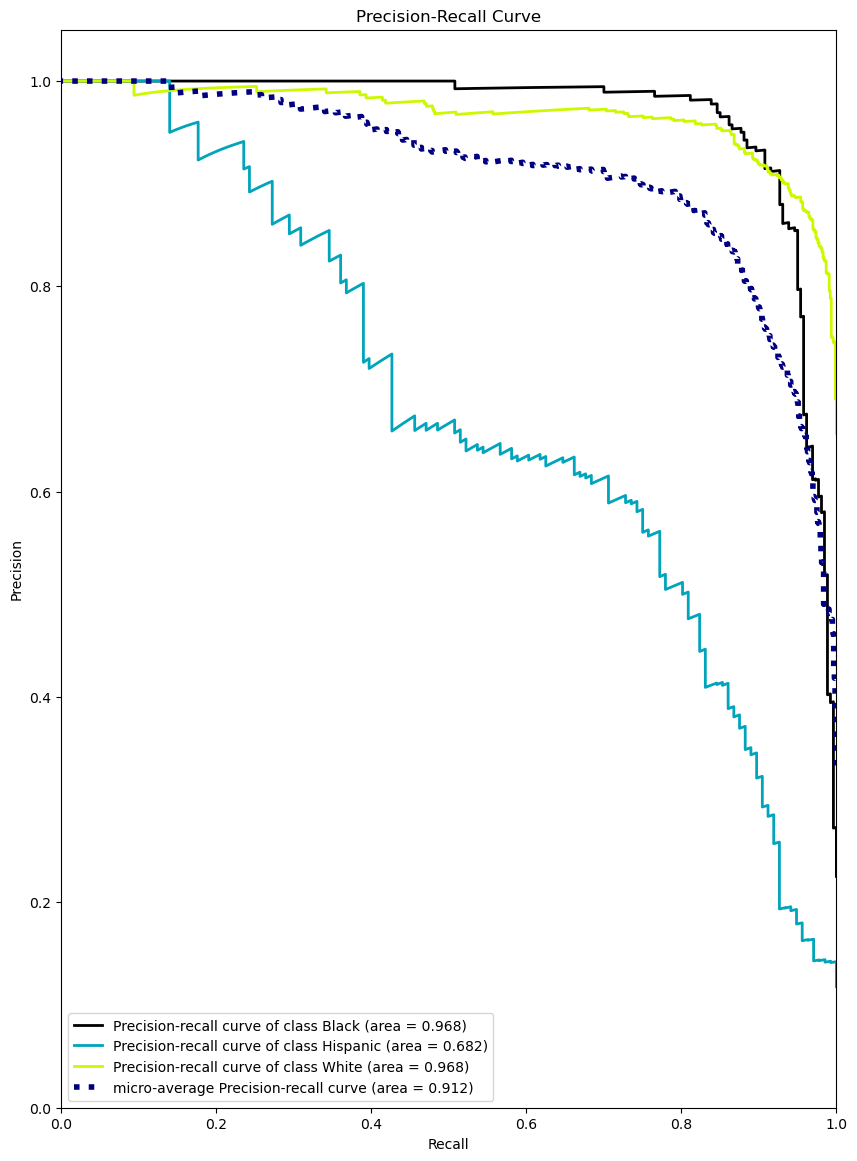

In [104]:
#Now, let's see the graph of it
operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)
#Here we cannot use predict_proba

plot_precision_recall(y_test, decision_function)
plt.show();
#As we can see from the graph, black class is higher but it is nearly the same as the white class. 
#And Hispanic is the less one

In [114]:
y_test_dum = pd.get_dummies(y_test).values

average_precision_score(y_test_dum[:, 1], decision_function[:, 1])

#The value here is less than logistic

0.6822405823886313

In [117]:
#To be able to use these values later on, I will assign them to values, to make it easy 
svc_pre = average_precision_score(y_test_dum[:, 1], decision_function[:, 1])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [122]:
print('Precision', svc_pre)
print('Recall', svc_recall)
print('f1', svc_f1)
#As we can see the recall score is higher

Precision 0.6822405823886313
Recall [0.81617647]
f1 [0.60326087]


## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___